<img src="logo.png">  <br>
* ref : https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv("./bike-sharing-demand/train.csv")
test = pd.read_csv("./bike-sharing-demand/test.csv")
sub = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")


In [4]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
train_test = train.append(test)
train_test.shape

(17379, 12)

### 날짜데이터 처리

In [18]:
from datetime import datetime as dt
train_test['datetime'] = pd.to_datetime(train_test['datetime'])
# train_test['datetime'] = train_test['datetime'].astype('datetime64')

train_test['yaer'] = train_test['datetime'].dt.year
train_test['month'] = train_test['datetime'].dt.month
train_test['day'] = train_test['datetime'].dt.day
train_test['hour'] = train_test['datetime'].dt.hour
train_test['week'] = train_test['datetime'].dt.dayofweek
train_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yaer,month,day,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,5


## EDA

#### 기초통계

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64


<AxesSubplot:>

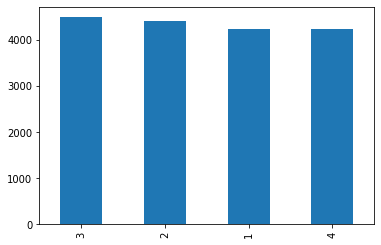

In [22]:
# season
print(train_test['season'].value_counts())
train_test['season'].value_counts().plot(kind="bar")

In [23]:
train_test['temp'].describe()

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temp, dtype: float64

<AxesSubplot:>

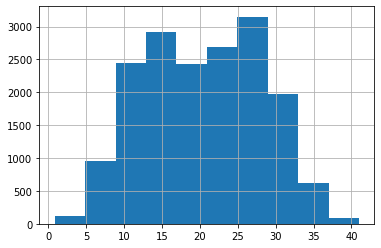

In [24]:
train_test['temp'].hist()

### 구간화(바이닝)
* dict - map()
* lambda & def - apply
* cut(), qcut()

In [25]:
train_test.loc[train_test['temp']<=0, 'temp_band1'] = 1
train_test.loc[(train_test['temp']>0) & (train_test['temp']<=13), 'temp_band1'] = 2
train_test.loc[(train_test['temp']>13) & (train_test['temp']<=20), 'temp_band1'] = 3
train_test.loc[(train_test['temp']>20) & (train_test['temp']<=27), 'temp_band1'] = 4
train_test.loc[(train_test['temp']>27) & (train_test['temp']<=45), 'temp_band1'] = 5
train_test.loc[train_test['temp']>45, 'temp_band1'] = 6

In [28]:
train_test['temp_band1'] = train_test['temp_band1'].astype('int')

In [30]:
# 수치비교(부등호) 안되기때문에 현재 상황에서는 사용 불가 ==> 단일성 값의 경우에 사용
# dict = {"A":1, "B":2} 
# train_test['temp_band2'] =train_test['temp'].map(dict) 

In [32]:
def temp_bind(x):
    temp_band1 = 0
    if x<=0:
        temp_band1 = 1
    elif (x>0) & (x<=13):
        temp_band1 = 2
    elif (x>13) & (x<=20):
        temp_band1 = 3
    elif (x>20) & (x<=27):
        temp_band1 = 4
    elif (x>27) & (x<=45):
        temp_band1 = 5
    else:
        temp_band1 = 6
    return temp_band1
train_test['temp_band2'] = train_test['temp'].apply(lambda x: temp_bind(x))

In [34]:
train_test['temp_band3'] =pd.cut(train_test['temp'], bins=[-100,0,13,20,27,45,100], labels=[1,2,3,4,5,6])

In [36]:
train_test[['temp','temp_band1','temp_band2','temp_band3']].head(20)

,temp,temp_band1,temp_band2,temp_band3
0,9.84,2,2,2
1,9.02,2,2,2
2,9.02,2,2,2
3,9.84,2,2,2
4,9.84,2,2,2
5,9.84,2,2,2
6,9.02,2,2,2
7,8.20,2,2,2
8,9.84,2,2,2
9,13.12,3,3,3
